In [2]:
using CSV
using DataFrames
using Plots
using StatsPlots

In [10]:
"Read and concatenate multiple data frames from files"
function read_and_concatenate(fnames...)
    df = CSV.read(fnames[1], DataFrame)
    for fname ∈ fnames[2:end]
        df2 = CSV.read(fname, DataFrame)
        df = [df; df2]
    end
    df
end


read_and_concatenate

In [11]:
julia_n2plain = read_and_concatenate("julia-n2plain.csv", "julia-n2plain-AA.csv")

Row,File,mean_particles,File_path,n_samples,time_per_event
,String31,Float64,String,Int64,Float64
1,events-ee-Z.hepmc3,43.05,data/events-ee-Z.hepmc3,16,10.5279
2,events-ee-H.hepmc3,64.97,data/events-ee-H.hepmc3,16,21.4829
3,events-pp-0.5TeV-5GeV.hepmc3,112.62,data/events-pp-0.5TeV-5GeV.hepmc3,16,42.3254
4,events-pp-1TeV-5GeV.hepmc3,160.36,data/events-pp-1TeV-5GeV.hepmc3,16,84.8246
5,events-pp-2TeV-5Gev.hepmc3,188.21,data/events-pp-2TeV-5Gev.hepmc3,16,126.859
6,events-pp-1TeV.hepmc3,226.98,data/events-pp-1TeV.hepmc3,16,179.001
7,events-pp-2TeV.hepmc3,226.98,data/events-pp-2TeV.hepmc3,16,179.45
8,events-pp-5TeV-10GeV.hepmc3,284.15,data/events-pp-5TeV-10GeV.hepmc3,16,287.095
9,events-pp-8TeV-20GeV.hepmc3,354.18,data/events-pp-8TeV-20GeV.hepmc3,16,464.255


In [13]:
fastjet_n2plain = read_and_concatenate("fastjet-n2plain.csv", "fastjet-n2plain-AA.csv")
fastjet_n2tiled = read_and_concatenate("fastjet-n2tiled.csv", "fastjet-n2tiled-AA.csv");

julia_n2tiled = read_and_concatenate("julia-n2tiled.csv", "julia-n2tiled-AA.csv")

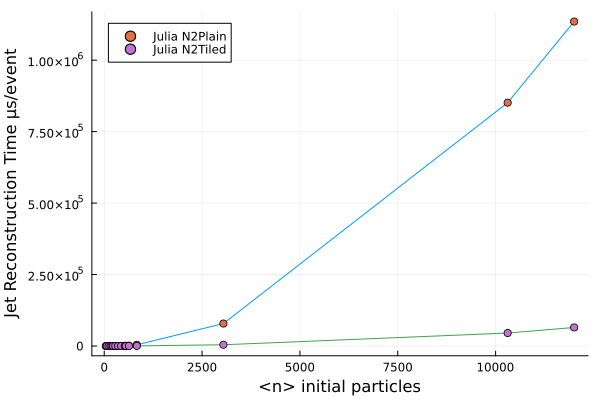

In [14]:
@df julia_n2plain plot(:mean_particles, :time_per_event, label="", xlabel="<n> initial particles", ylabel="Jet Reconstruction Time μs/event")
@df julia_n2plain scatter!(:mean_particles, :time_per_event, label = "Julia N2Plain")
@df julia_n2tiled plot!(:mean_particles, :time_per_event, label="")
@df julia_n2tiled scatter!(:mean_particles, :time_per_event, label = "Julia N2Tiled")

In [15]:
savefig("julia-jet-reco-all.pdf")

"/Users/graemes/code/JetReconstructionBenchmarks.jl/results/julia-jet-reco-all.pdf"

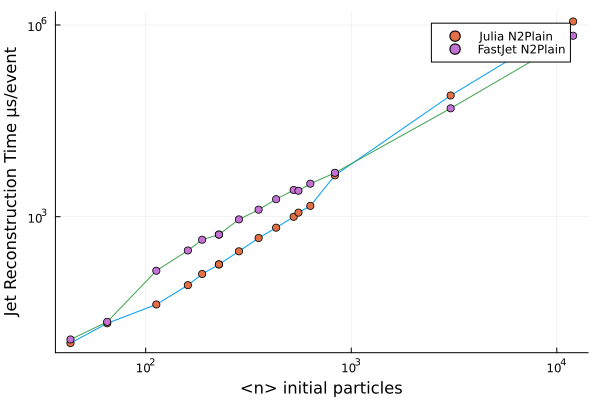

In [18]:
@df julia_n2plain plot(:mean_particles, :time_per_event, label="", xlabel="<n> initial particles", ylabel="Jet Reconstruction Time μs/event", yaxis=:log10, xaxis=:log10)
@df julia_n2plain scatter!(:mean_particles, :time_per_event, label = "Julia N2Plain")
@df fastjet_n2plain plot!(:mean_particles, :time_per_event, label = "")
@df fastjet_n2plain scatter!(:mean_particles, :time_per_event, label = "FastJet N2Plain")

In [19]:
savefig("julia-fastjet-reco-n2plain-all-log10.pdf")

"/Users/graemes/code/JetReconstructionBenchmarks.jl/results/julia-fastjet-reco-n2plain-all-log10.pdf"

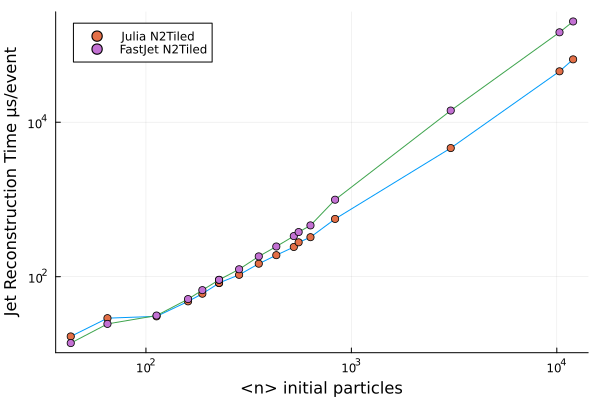

In [20]:
@df julia_n2tiled plot(:mean_particles, :time_per_event, label="", xlabel="<n> initial particles", ylabel="Jet Reconstruction Time μs/event", yaxis=:log10, xaxis=:log10)
@df julia_n2tiled scatter!(:mean_particles, :time_per_event, label = "Julia N2Tiled")
@df fastjet_n2tiled plot!(:mean_particles, :time_per_event, label = "")
@df fastjet_n2tiled scatter!(:mean_particles, :time_per_event, label = "FastJet N2Tiled")

In [21]:
savefig("julia-fastjet-reco-n2tiled-all-log10.pdf")

"/Users/graemes/code/JetReconstructionBenchmarks.jl/results/julia-fastjet-reco-n2tiled-all-log10.pdf"

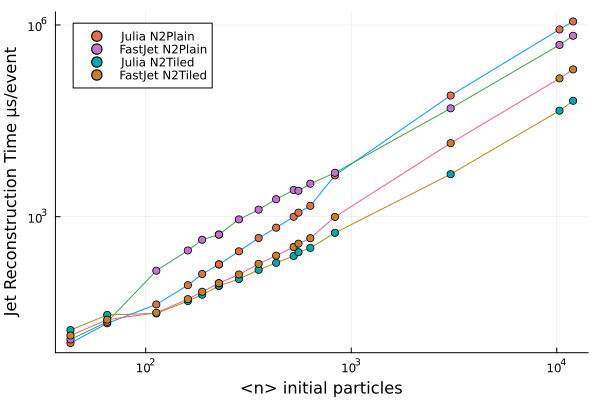

In [23]:
@df julia_n2plain plot(:mean_particles, :time_per_event, label="", xlabel="<n> initial particles", ylabel="Jet Reconstruction Time μs/event", yaxis=:log10, xaxis=:log10, legend=:topleft)
@df julia_n2plain scatter!(:mean_particles, :time_per_event, label = "Julia N2Plain")
@df fastjet_n2plain plot!(:mean_particles, :time_per_event, label = "")
@df fastjet_n2plain scatter!(:mean_particles, :time_per_event, label = "FastJet N2Plain")
@df julia_n2tiled plot!(:mean_particles, :time_per_event, label="")
@df julia_n2tiled scatter!(:mean_particles, :time_per_event, label = "Julia N2Tiled")
@df fastjet_n2tiled plot!(:mean_particles, :time_per_event, label = "")
@df fastjet_n2tiled scatter!(:mean_particles, :time_per_event, label = "FastJet N2Tiled")


In [24]:
savefig("julia-fastjet-all-log10.pdf")

"/Users/graemes/code/JetReconstructionBenchmarks.jl/results/julia-fastjet-all-log10.pdf"